# A Few of My Favorite Things About Pandas (in no particular order)

1. Large Datasets
     * Pandas has no limit on table size
     * Excel is limited to 1,048,576 rows by 16,384 columns (per Microsoft)
          * Excel typically becomes sluggish well before approaching this limit
          * Excel add-ons can allow for much larger datasets... but, at the end of the day, it's still Excel. 

2. Format Flexibility 
     * Pandas can import data from any source (.csv, .xlsx, SQL, etc) and then output data to any source.  
     * Pandas can output a .html or $\LaTeX$ table in one line (a total win)
     * Excel can handle most data sources as well, but it prefers its native .xlsx extension which can lead to formatting issues upon importing/exporting.

3. Repeatability and Modularity
     * Python is a programming language, not a data analysis software package/gui.  
         * Custom modules can be built to perform specific tasks repeatedly
         * This makes version control a breeze with Github or similar services
         * This open's up virtually limitless possibilites for web development, visualizations, etc.
     * Excel can be coupled with VBA to accomplish similar tasks (but seriously, why would anyone want to code in VBA when you can basically "talk" to your computer with Python?)

4. Data Cleaning
    * In Pandas, tasks such as elminating bad data, filtering, renaming columns, reindexing, etc, are all one-liners using built-in functions.
    * ... I'm scared to even attempt such tasks in Excel 

5. Joining/Merging
     * Taking two (or more) separates datasets and combining them into one is a simple procedure in Pandas
     * Excel does not really perform straight up SQL style joins.  There are definitely workarounds, but they are rather slow and certainly less straightforward

6. Aggregation
    * Pandas' "split-apply-combine" strategy allows for any function to be easily applied to groups of data resulting in a rapid method for summarizing data by group.

7. Data Visualization 
    * Python's Matplotlib library can be used to create publication quality graphics.
        * __All__ elements of a plot can be modified
        * Graphics can be easily exported to vector image format.
    * Other Python plotting modules (Bokeh, Plotly, Plotly Express, etc) allow for interactive graphics.
    * Plots generated in Excel .... look like they were generated in Excel (which is not good)
        * Preset chart formats can look okay, but customization is very difficult to non-existent.

8. Documentation
    * Python has an extraordinary (and mostly friendly) open source community that has already answered 99.9% of any questions you could possibly have (which means, most code as already been written for you).

9. Syntax 
    * Python is high level language with a natural, readable syntax
        * This becomes very useful when collaborating on projects - well written python code is easy to follow.
    * Excel - What sadistic developer thought dollar signs were a good idea??

10. Cost
    * Python = Free
    * Excel = Not Free
---
---


# The Pandas DataFrame 

Pandas is quite likely the most important python module available to engineers; it is a data science tool that utilizes the python language to provide a powerful framework for processing, analyzing and presenting data.  At the very heart of pandas is an object called a DataFrame - a pandas.DataFrame() to be exact.  The dataframe serves as the storehouse for all your data; it is essentially a massive table in which you have columns that represent data fields and rows that represent a particular observance of these data fields, that is each row is indexed by some referance field that indicates when or where each row of data was measured.  These data can come from any source; they can imported from a .csv file, queried from a SQL Server, or generated right in the python session.

To introduce the dataframe object, let's consider the case of plotting some function such as $f(x)=\frac{cos(x)}{1+x}$


### Generating data within a script

Begin (as most python scripts do) by importing the modules you will be using.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


We proceed as follows:
1. Create the input column, $x$, using the *linspace* function from the numpy package.  This function (identical to linspace MatLab users will be familiar with) just generates an array of equally spaced values between two specified numbers; the syntax is *np.linspace(Start,Stop,NumberOfPoints)*
2. Create a *dictionary* which contains three keys, *Function1*, *Function2*, and *Input*.  Each key is basically just a label for each corresponding variable contained within the dictionary, so rather than just creating an *array* of three different variables, we create a *dictionary* of three different variables where each variable is accessed using its key rather than a positional index.  In this case, each variable is an array; the *Input* variable is just the $x$ values we already made.  Let's make *Function1* be a decaying $cosine$ function, and let's have *Function2* be a decaying $sine$ function
3. Convert the variable $Data$ (which is a dictionary object) into a pandas *DataFrame* object called $DF$.  Dictionaries are native python objects that are useful for storing data, but very useful for operating upon data - that is what the DataFrame object is for.

In [2]:
# Create input array
x=np.linspace(0,6*np.pi,1000)

# Create Dictionary that stores input as well as output of both functions
Data={'Function1':np.cos(x)*1/(1+x),'Function2':np.sin(x)*1/(1+x),'Input':x}

# Convert the Dictionary into a dataframe
DF=pd.DataFrame(Data)

We can take a look at our DataFrame by typing in the variable name, $DF$

In [3]:
DF

,Function1,Function2,Input
0,1.000000,0.000000e+00,0.000000
1,0.981306,1.851790e-02,0.018868
2,0.962949,3.635593e-02,0.037737
3,0.944911,5.354417e-02,0.056605
4,0.927176,7.011056e-02,0.075474
5,0.909727,8.608116e-02,0.094342
6,0.892552,1.014802e-01,0.113211
7,0.875637,1.163305e-01,0.132079
8,0.858970,1.306531e-01,0.150947
9,0.842539,1.444679e-01,0.169816


Everything seems to be in order.  Note that we have three labeled columns and 1000 rows (it says 999 as the last index, but don't forget that it starts at 0).

There are two ways we can access a specfic column of a *DataFrame*; we can either use brackets to specificy the column name as a string or we can use  a period to specify the column name as an attribute of the *DataFrame* object. For instance, either line below will return the same result.

In [4]:
DF['Function1']
DF.Function1

0      1.000000
1      0.981306
2      0.962949
3      0.944911
4      0.927176
5      0.909727
6      0.892552
7      0.875637
8      0.858970
9      0.842539
10     0.826335
11     0.810348
12     0.794569
13     0.778989
14     0.763601
15     0.748398
16     0.733373
17     0.718520
18     0.703833
19     0.689307
20     0.674937
21     0.660719
22     0.646647
23     0.632719
24     0.618930
25     0.605277
26     0.591757
27     0.578367
28     0.565104
29     0.551966
         ...   
970    0.044243
971    0.044700
972    0.045140
973    0.045563
974    0.045970
975    0.046359
976    0.046731
977    0.047085
978    0.047422
979    0.047742
980    0.048044
981    0.048328
982    0.048595
983    0.048843
984    0.049074
985    0.049287
986    0.049482
987    0.049660
988    0.049819
989    0.049960
990    0.050083
991    0.050188
992    0.050275
993    0.050344
994    0.050394
995    0.050427
996    0.050442
997    0.050439
998    0.050418
999    0.050379
Name: Function1, Length:

We can utilize the *Matplotlib* package to create some nice plots of our data.

Text(0.5, 0.98, 'Example of Plotting in Matplotlib')

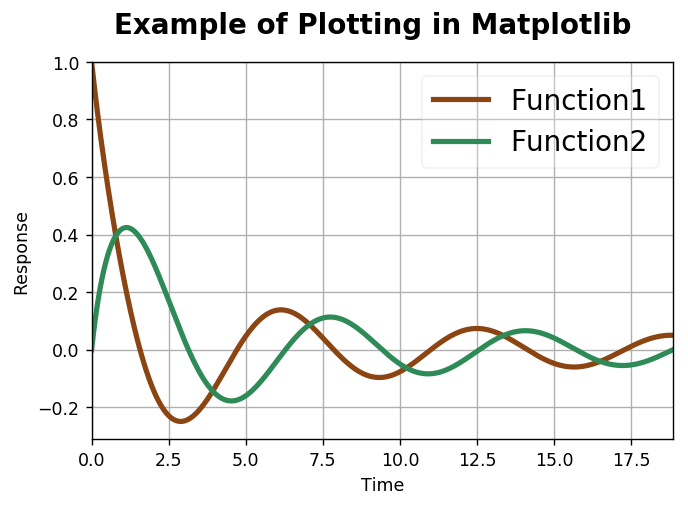

In [5]:
'''Create figure and axes objects'''
fig=plt.figure(dpi=125)
ax=plt.axes()

'''Generate the plots and add a grid to the axis'''
plt.plot(DF.Input,DF.Function1,color='saddlebrown',linewidth=3,label='Function1')
plt.plot(DF.Input,DF.Function2,color='seagreen',linewidth=3,label='Function2')
plt.grid()

'''Add a legend and set the axis limits and labels'''
ax.legend(loc='upper right',fontsize=16,facecolor='white',framealpha=0.25)
ax.set_xlim(right = DF.Input.iloc[-1] , left = DF.Input.iloc[0])
ax.set_ylim(top=1)
ax.set_ylabel('Response')
ax.set_xlabel('Time')

'''Create a title for the figure'''
fig.suptitle('Example of Plotting in Matplotlib', fontsize=16, weight='bold')

Next, lets generate a cool plot using the *fill_between()* function from *matplotlib*.

Text(0.5, 0.98, 'Example of Plotting in Matplotlib with fill_between()')

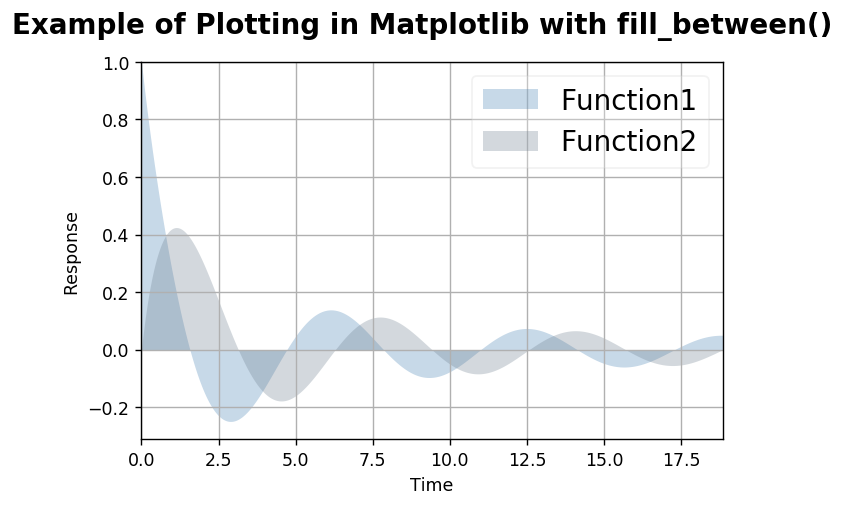

In [6]:
'''Create a new set of figure and axes objects'''
fig2=plt.figure(dpi=125)
ax2=plt.axes()

'''Generate the plots and add a grid to the axis'''
plt.fill_between(DF.Input,DF.Function1,color='steelblue',alpha=0.3,linewidth=0,label='Function1')
plt.fill_between(DF.Input,DF.Function2,color='slategrey',alpha=0.3,linewidth=0,label='Function2')
plt.grid()

'''Add a legend and set the axis limits and labels'''
ax2.legend(loc='upper right',fontsize=16,facecolor='white',framealpha=0.25)
ax2.set_xlim(right = DF.Input.iloc[-1] , left = DF.Input.iloc[0])
ax2.set_ylim(top=1)
ax2.set_ylabel('Response')
ax2.set_xlabel('Time')

'''Create a title for the figure'''
fig2.suptitle('Example of Plotting in Matplotlib with fill_between()', fontsize=16,weight='bold')

---
### Importing Data From a .csv File

Next, lets play with some actual data from a project I did for my ME 553 Feeback Control Systems class.  For this project, I was using an Arduino to control the temperature of a heating element; the goal was to use PID control to reach and then maintain a certain target (50$^{\circ}$) temperature. To assist in the project analysis, I wrote a python script that logged serial output from an Arduino into a .csv file.  The Arduino measured and output the following parameters to the log file:

1. Time at which the sample was taken
2. Ambient Temperature
3. Heating Element Temperature
4. Duty Cycle of the Heating Element

We can open these data from the .csv file using the Pandas function *read_csv()*.

In [7]:
'''Store the name of the csv file - note that it has to be in our current directory if we just supply
the name, otherwise we have to supply the entire path to the file; however, there are some super nice
python modules that make this task pretty easy.'''

FileName='TempData.csv'

'''Create the DataFrame'''
DF2=pd.read_csv(FileName)


If we wish to verify that the data loaded in properly, a handy function to use is the *head()* function  wich is a method of a *DataFrame* object. The *head* function just returns the first five rows of the DataFrame we access it through.

In [8]:
DF2.head()

,Time,Ambient,Heater,Duty Cycle
0,2019-04-25 18:34:20,NaN,NaN,NaN
1,2019-04-25 18:34:21,19.00,NaN,NaN
2,2019-04-25 18:34:21,20.37,19.0,NaN
3,2019-04-25 18:34:21,20.37,19.0,100.0
4,2019-04-25 18:34:22,20.37,19.0,72.9


See how that works?  We have our *DataFrame* object named DF2 and we call the *head()* function through this dataframe using the '.' followed by the function name.  This is how functions specific to *DataFrame* objects can be called - *head()* is just one of many, many functions that can be called through a *DataFrame* object. For instance, we could type *DF2.tail()* to get the last five rows of the dataframe or we could type *DF2.max()* to get the maximum value of each column.

In [9]:
DF2.tail()

,Time,Ambient,Heater,Duty Cycle
1309,2019-04-25 18:42:26,20.44,50.00,15.6
1310,2019-04-25 18:42:26,20.44,50.25,NaN
1311,2019-04-25 18:42:26,20.44,50.25,9.2
1312,2019-04-25 18:42:27,20.44,50.25,1.3
1313,2019-04-25 18:42:27,20.37,50.00,2.9


In [10]:
DF2.max()

Time          2019-04-25 18:42:27
Ambient                     21.37
Heater                         51
Duty Cycle                    100
dtype: object

Or, another really useful function is *describe()*. This one gives us a summary of the dataset by returning several statistics about each column.

In [11]:
DF2.describe()

,Ambient,Heater,Duty Cycle
count,1313.000000,1312.000000,1019.000000
mean,20.467540,48.204078,11.313445
std,0.119488,6.627716,17.084617
min,19.000000,19.000000,0.100000
25%,20.440000,49.750000,3.600000
50%,20.500000,50.000000,5.200000
75%,20.500000,50.250000,10.200000
max,21.370000,51.000000,100.000000


Note that the *count* value (which gives the number of rows in the column) for Ambient is 1313 while the *counts* for Heater and DutyCycle are 1312 and 1019 respectively.  This is because the Heater and Duty Cycle columns contain some *NAN* values which are not counted... fortunately, pandas has a really slick function for solving this problem. Let's type in *DF2.dropna(how='any').head()* and see what happens.

In [12]:
DF2.dropna(how='any').head()

,Time,Ambient,Heater,Duty Cycle
3,2019-04-25 18:34:21,20.37,19.0,100.0
4,2019-04-25 18:34:22,20.37,19.0,72.9
5,2019-04-25 18:34:22,20.37,19.0,72.9
6,2019-04-25 18:34:22,20.44,19.0,72.9
7,2019-04-25 18:34:23,20.37,19.0,72.9


Nice! the *NAN* values are gone now.  The *dropna()* function allows us to drop rows that contain *NAN* values from the dataframe, and the cool thing is we can specify how we want to deal with *NAN*. For our case, we wanted to eliminate rows that contain any *NAN*, so we passed the argument *how ='any'* to *dropna()*. If we only wanted to drop rows where all the values in that row are *NAN*, then we could have just specified *how='all'*.

Another item to note is that we called two functions in sequence on *DF2*; we first called *dropna* and then called *head*. This can be useful, but note that these these functions are called sequentially meaning that the first function is executed on the calling dataframe and then the second function is executed on the dataframe that is returned by the first function.

We just ran the *dropna()* function on the *DF2* dataframe, but what happens to *DF2*? is it changed at all?  The variable *DF2* was created and stored in memory when we first created it using the *read_csv()* function.  When we called the *head*, *tail*, *describe*, and *dropna* functions on *DF2*, those functions had no impact on *DF2*; they just returned a new *DataFrame* object that is not stored in memory.  If we want to change *DF2*, then we can just set *DF2* equal to this new dataframe.

In [13]:
DF2=DF2.dropna(how='any')
DF2.describe()

,Ambient,Heater,Duty Cycle
count,1019.000000,1019.000000,1019.000000
mean,20.470972,47.692836,11.313445
std,0.109524,7.378318,17.084617
min,19.690000,19.000000,0.100000
25%,20.440000,49.750000,3.600000
50%,20.440000,50.000000,5.200000
75%,20.500000,50.000000,10.200000
max,21.370000,51.000000,100.000000


If we now call *describe* on *DF2*, we see that we have made the desired changes to *DF2*; however, it should be noted that the Time column is missing, that is, *describe* returns no summaries on the Time column.  This is because Time is a non-numeric type, specifically, Time contains data of type *string*, and obiously, statistical summaries do not pertain to *strings*.  This leads to a very important conept in pandas and in programming in general - Data Types.  Every column in a *DataFrame* has a specific *type* associated with it.  When we import from a .csv file, Pandas automatically converts any numeric data straight to an appropriate *type* (typically, *float64*); however, non-numeric data are left as *string*.  We can check the data types of our dataframe using the *dtypes* attribute.

In [14]:
DF2.dtypes

Time           object
Ambient       float64
Heater        float64
Duty Cycle    float64
dtype: object

Note that Ambient, Heater, and Duty Cycle are all *float64* while Time is just *object*. For our case, we want Time to be of type *datetime* as the *datetime* type allows us to perform many useful operations on the timstamp; we can accomplish this by using the *to_datetime()* function from Pandas.

In [15]:
DF2['Time'] = pd.to_datetime(DF2.Time)
DF2.dtypes

Time          datetime64[ns]
Ambient              float64
Heater               float64
Duty Cycle           float64
dtype: object

In [16]:
DF2.head(10)

,Time,Ambient,Heater,Duty Cycle
3,2019-04-25 18:34:21,20.37,19.0,100.0
4,2019-04-25 18:34:22,20.37,19.0,72.9
5,2019-04-25 18:34:22,20.37,19.0,72.9
6,2019-04-25 18:34:22,20.44,19.0,72.9
7,2019-04-25 18:34:23,20.37,19.0,72.9
8,2019-04-25 18:34:23,20.44,19.0,72.9
9,2019-04-25 18:34:24,20.44,19.0,72.9
10,2019-04-25 18:34:24,20.44,19.0,72.9
11,2019-04-25 18:34:24,20.44,19.0,72.9
12,2019-04-25 18:34:25,20.44,19.0,72.9


Checking the data types again, we now see that the Time column is *datetime64*, which is what we want - a timestamp for each row.  However, if we look once more at the dataframe, we note that there seems to be repeat values for some timestamp. For instance, note that there are three entrires with at timestamp of _2019-04-25 18\:34\:22_.  This behavior arises from a (since fixed) bug in my arduino logging program; I had reduced the sampling time and failed to increase the precision of the timestamp to include milliseconds.  Since I would prefer to not have three separate temperature readings corresponding to one second, we can have pandas resample the entire dataframe with a one second frequency - taking the average value of any repeated time stamps.

In [17]:
'''Resample the dataframe - note we have to reset the index in order to retain Time as a column ... it is mildy annoying'''
DF2=DF2.resample('1s',on='Time').mean().reset_index()


DF2.head(10)

,Time,Ambient,Heater,Duty Cycle
0,2019-04-25 18:34:21,20.370000,19.0,100.0
1,2019-04-25 18:34:22,20.393333,19.0,72.9
2,2019-04-25 18:34:23,20.405000,19.0,72.9
3,2019-04-25 18:34:24,20.440000,19.0,72.9
4,2019-04-25 18:34:25,20.416667,19.0,72.9
5,2019-04-25 18:34:26,20.416667,19.0,72.9
6,2019-04-25 18:34:27,20.405000,19.0,72.9
7,2019-04-25 18:34:28,20.440000,19.0,72.9
8,2019-04-25 18:34:29,20.416667,19.0,72.9
9,2019-04-25 18:34:30,20.440000,19.0,72.9


Cool, note that the repeated timestamps are gone and we now have only one entry per second.  Since we would eventually like to generate a plot that shows the time response of the heating element, we should create a new columns that gives the time elapsed rather than an absolute timestamp.  That is, we want a column that begins at $t=0$ and gives the number of seconds since this initial timestamp.  There are a few ways to accomplish this, but here is how I typically create this column.

In [18]:
DF2['TimeElapsed'] = (DF2.Time-DF2.Time.iloc[0]).dt.total_seconds()

The above line is just subtracting off the first Timestamp in the Time column from every element in the Time column - that is what *(DF2.Time-DF2.Time.iloc[0])* does.  Next, we use the *dt* operator to access the *total_seconds()* function which converts each time difference into seconds - giving us a running count of time elapsed.  

Also, it should be noted that in order to extract the first element in the Time column, we use *DF2.Time.iloc[0]*.  The *iloc[n]* accessor is very useful as it just grabs the *nth* elementh of specified column.  So, for instance, *DF2.Time.iloc[10]* would give us the tenth element in the Time column and *DF2.Time.iloc[-1]* would actually give us the last element in the Time column.

Let's check what our Dataframe looks like now.

In [19]:
DF2

,Time,Ambient,Heater,Duty Cycle,TimeElapsed
0,2019-04-25 18:34:21,20.370000,19.000000,100.000000,0.0
1,2019-04-25 18:34:22,20.393333,19.000000,72.900000,1.0
2,2019-04-25 18:34:23,20.405000,19.000000,72.900000,2.0
3,2019-04-25 18:34:24,20.440000,19.000000,72.900000,3.0
4,2019-04-25 18:34:25,20.416667,19.000000,72.900000,4.0
5,2019-04-25 18:34:26,20.416667,19.000000,72.900000,5.0
6,2019-04-25 18:34:27,20.405000,19.000000,72.900000,6.0
7,2019-04-25 18:34:28,20.440000,19.000000,72.900000,7.0
8,2019-04-25 18:34:29,20.416667,19.000000,72.900000,8.0
9,2019-04-25 18:34:30,20.440000,19.000000,72.900000,9.0


Looks good!  However, it should be noted that the current index of the dataframe is really not very helpful as is it just based upon the original position of each element before we dropped the *NAN* values, so we end up with an index starting at 3.  We could very easily just *reindex* this dataframe to generate a new positional index; however, it is always a good idea to index by some meaningful parameter rather than just position.  Since we are working with time dependent data, it would make sense to index by our TimeElapsed column.

In [20]:
DF2.set_index('TimeElapsed',inplace=True)

In [21]:
DF2

,Time,Ambient,Heater,Duty Cycle
TimeElapsed,,,,
0.0,2019-04-25 18:34:21,20.370000,19.000000,100.000000
1.0,2019-04-25 18:34:22,20.393333,19.000000,72.900000
2.0,2019-04-25 18:34:23,20.405000,19.000000,72.900000
3.0,2019-04-25 18:34:24,20.440000,19.000000,72.900000
4.0,2019-04-25 18:34:25,20.416667,19.000000,72.900000
5.0,2019-04-25 18:34:26,20.416667,19.000000,72.900000
6.0,2019-04-25 18:34:27,20.405000,19.000000,72.900000
7.0,2019-04-25 18:34:28,20.440000,19.000000,72.900000
8.0,2019-04-25 18:34:29,20.416667,19.000000,72.900000


Next let's generate a time series plot for these data

Text(0.5, 0.98, 'Plot of Demo Temperature Data')

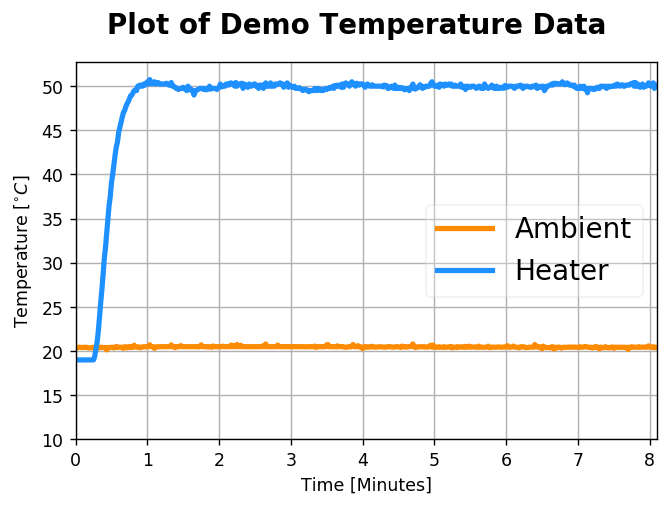

In [22]:
'''Create figure and axes objects'''
fig3=plt.figure(dpi=125)
ax3=plt.axes()

'''Generate the plots and add a grid to the axis'''
plt.plot(DF2.index/60,DF2.Ambient,color='darkorange',linewidth=3,label='Ambient')
plt.plot(DF2.index/60,DF2.Heater,color='dodgerblue',linewidth=3,label='Heater')
plt.grid()

'''Add a legend and set the axis limits and labels'''
ax3.legend(loc='center right',fontsize=16,facecolor='white',framealpha=0.25)
ax3.set_xlim(right = DF2.index[-1]/60 , left = DF2.index[0]/60)
ax3.set_ylim(bottom=10,top=DF2.Heater.max()+2)
ax3.set_ylabel('Temperature [$^{\circ}C$]')
ax3.set_xlabel('Time [Minutes]')

'''Create a title for the figure'''
fig3.suptitle('Plot of Demo Temperature Data', fontsize=16, weight='bold')

## Conclusion
In this notebook, we have looked at the basic mechanics of the Pandas Dataframe.
* What a DataFrame is
* How to create a DataFame
    * From an array of data generated in python
    * From data stored in a .csv file
* Basic data processing operations
    * How to handle *NAN*
    * How to identify column data types
    * How to change column data types (string to datetime)
    * How to redindex a using a time series
    * How to change the index
    * How to create a cumulative time series column 
    


## Bonus

Pandas also supports an excpetionally useful function for generating tables in $\LaTeX$ and HTML.  This code will generate just very basic tables - the $\LaTeX$ one isn't too bad looking, but the HTML one looks like it belongs on a Windows 95 machine. We could alter the appearance of this table by writing a .css file that supplies the table styling we want, and then tell pandas to use this style class for rendering the table. This process can be used to create sleek, interactive tables.

In [23]:
with open('TexSampleTable.tex', 'w') as file:
     file.write(DF2.describe().to_latex(float_format="{:0.2f}".format))

with open('HTMLSampleTable.html', 'w') as file:
     file.write(DF2.describe().to_html())
